<a href="https://colab.research.google.com/github/kgpark88/ai-summary/blob/main/10_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층신경망(DNN, Deep Neural Network)

① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
카테고리 데이터, 더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

### ① 라이브러리 임포트

In [37]:
!pip install -q tensorflow

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

### ② 데이터 로드

In [2]:
df = pd.read_csv('telecom-churn-data.csv')

### ③ 데이터 분석

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


C:\Users\Administrator\AppData\Local\Temp\ipykernel_26384\1145409529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['MonthlyCharges'][:-1].sort_values().plot(kind='bar')


<Axes: >

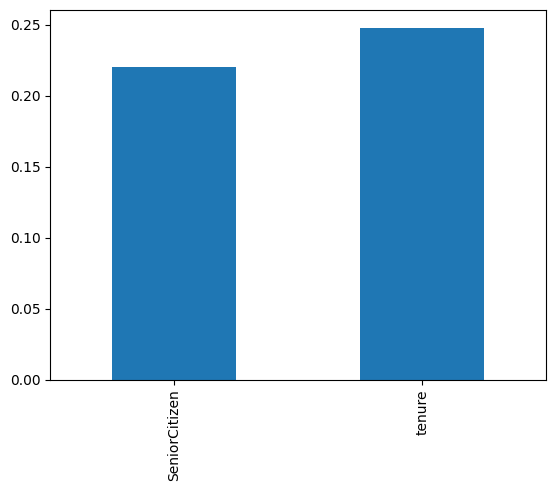

In [6]:
df.corr()['MonthlyCharges'][:-1].sort_values().plot(kind='bar')

### ④ 데이터 전처리

In [7]:
df.drop('customerID', axis=1, inplace=True)

In [8]:
df['TotalCharges'].replace([' '], ['0'], inplace=True)

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

### 더미 특성 생성

In [11]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod']

In [12]:
dummies = pd.get_dummies(df[cols], drop_first=True)

In [13]:
df = df.drop(cols, axis=1)

In [14]:
df = pd.concat([df, dummies], axis=1)

In [15]:
# df = pd.get_dummies(df)
# cols = list(df.select_dtypes('object').columns)

### ⑤ Train, Test  데이터셋 분할

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [19]:
X_train.shape

(4930, 30)

In [20]:
y_train.shape

(4930,)

### 데이터 정규화/스케일링(Normalizing/Scaling)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 모델 입력갯수, 출력갯수 확인

In [23]:
X_train.shape

(4930, 30)

In [24]:
y_train.shape

(4930,)

### ⑦ 모델 구성

In [25]:
model = Sequential()

# input layer
model.add(Dense(64, activation='relu', input_shape=(30,)))

# hidden layer
model.add(Dense(64, activation='relu'))

# hidden layer
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

d:\강의자료\MLflow\py311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 모델 구성 -  과적합 방지

In [26]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(30,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

### 모델 확인

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,497 (72.25 KB)

 Trainable params: 18,497 (72.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
hidden1 = model.layers[0]

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
print(weights)

[[ 0.1532446  -0.0751954  -0.05983916 ...  0.06282441 -0.15039642
  -0.17776279]
 [-0.04541437  0.18479474 -0.01756573 ... -0.16133772 -0.18298829
  -0.01995489]
 [-0.14775169  0.12946694  0.19083317 ... -0.05311097  0.00838716
   0.14749567]
 ...
 [-0.07444014  0.17589112 -0.10699061 ... -0.00356053 -0.1728871
  -0.06882487]
 [ 0.16129617 -0.13305333  0.1749895  ... -0.13336039 -0.11987926
   0.07938491]
 [ 0.01439482 -0.07570494  0.06820183 ... -0.01883467 -0.05515781
  -0.16326264]]


In [31]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


#### 모델 컴파일 – 이진 분류 모델

In [32]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

- 모델 컴파일 – 다중 분류 모델  
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 


- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

### 모델 훈련(학습) 하기

In [33]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=10)

Epoch 1/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6588 - loss: 0.5992 - val_accuracy: 0.7605 - val_loss: 0.4388
Epoch 2/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7610 - loss: 0.4862 - val_accuracy: 0.7993 - val_loss: 0.4373
Epoch 3/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.4699 - val_accuracy: 0.7974 - val_loss: 0.4286
Epoch 4/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7858 - loss: 0.4569 - val_accuracy: 0.8022 - val_loss: 0.4259
Epoch 5/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7893 - loss: 0.4617 - val_accuracy: 0.7970 - val_loss: 0.4241
Epoch 6/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7720 - loss: 0.4624 - val_accuracy: 0.8031 - val_loss: 0.4340
Epoch 7/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7872 - loss: 0.4507 - val_accuracy: 0.7998 - val_loss: 0.4215
Epoch 8/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 0.4488 - val_accuracy: 0.

### 모델 훈련(학습) - 조기종료

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=25)

In [44]:
checkpoint_filepath = "./checkpoint.model.keras"
check_point = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor="val_loss",
    mode="min",
    verbose=1,
    save_best_only=True
)

In [45]:
history = model.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50


221/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4123
Epoch 1: val_loss improved from inf to 0.42130, saving model to ./checkpoint.model.keras
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8096 - loss: 0.4128 - val_accuracy: 0.8060 - val_loss: 0.4213
Epoch 2/50
233/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.4177
Epoch 2: val_loss did not improve from 0.42130
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.4180 - val_accuracy: 0.8022 - val_loss: 0.4247
Epoch 3/50
236/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4191
Epoch 3: val_loss improved from 0.42130 to 0.42128, saving model to ./checkpoint.model.keras
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7979 - loss: 0.4191 - val_accuracy: 0.8017 - val_loss: 0.4213
Epoch 4/50
235/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.4204
Epoch 4: val_loss improved from 0.42128 to 0.42019, saving model to ./checkpoint.model.

### ⑧ 모델 성능 평가

In [46]:
losses = pd.DataFrame(model.history.history)

In [47]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.806694,0.416182,0.805963,0.421305
1,0.806694,0.422913,0.802177,0.424673
2,0.806897,0.419226,0.801704,0.421280
3,0.804665,0.418995,0.805963,0.420192
4,0.811156,0.418659,0.805490,0.422886


<Axes: >

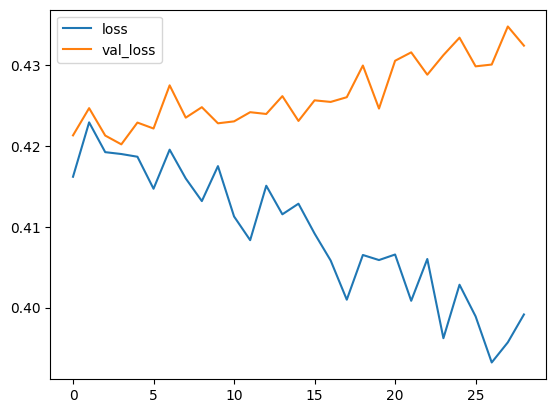

In [48]:
losses[['loss','val_loss']].plot()

<Axes: >

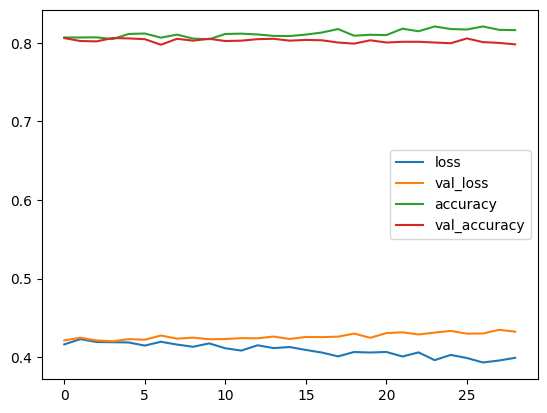

In [49]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1539
           1       0.66      0.56      0.61       574

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



In [ ]:
print(confusion_matrix(y_test, predictions))

[[1377  162]
 [ 254  320]]
